In [17]:
import pandas as pd

df = pd.read_csv("salaries.csv")
print(df.shape)
df.head()


(10000, 15)


,age,workclass,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,years_experience,skills,salary_in_inr
0,29,Private,Associate,Divorced,Data Analyst,Black,Male,1679,1385,53,Australia,<=50K,13,"SQL, Python, Tableau",923132
1,36,Local-gov,Some-college,Never-married,Data Analyst,Other,Female,3611,919,48,Canada,>50K,0,"Excel, Tableau, Python",700000
2,31,Self-emp-not-inc,PhD,Never-married,ML Engineer,Amer-Indian-Eskimo,Male,5881,1735,41,Australia,<=50K,1,"Pandas, Python, Scikit-learn",1012582
3,57,Self-emp-inc,Associate,Widowed,Web Developer,Other,Male,1139,93,51,United States,>50K,2,"CSS, HTML, Node.js",638216
4,51,State-gov,PhD,Married-civ-spouse,Web Developer,Asian-Pac-Islander,Male,4374,1437,59,China,>50K,19,"CSS, Node.js, HTML",1077793


C:\Users\sarah\AppData\Local\Temp\ipykernel_7640\998480499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='occupation', y='salary_in_inr', palette='Set3')


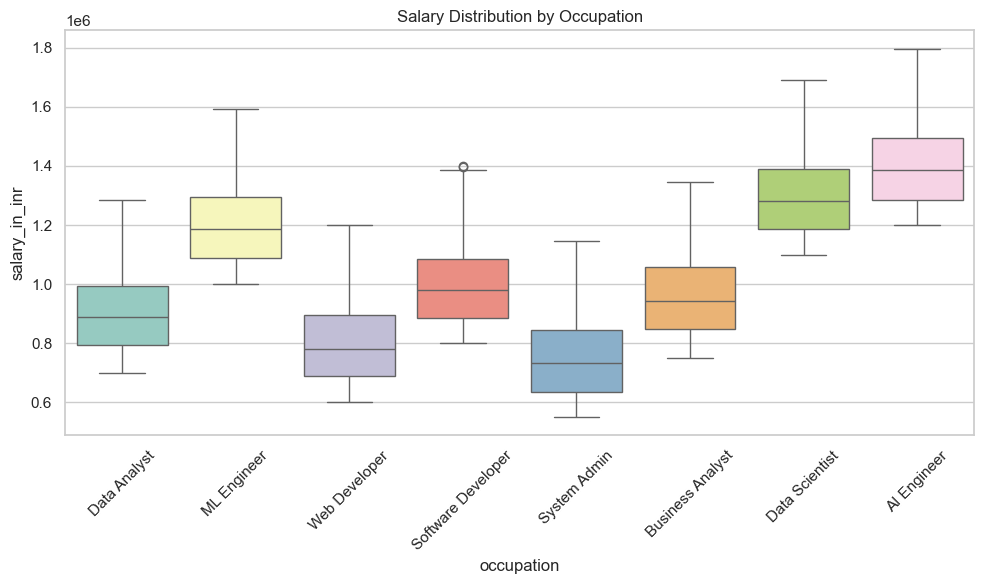

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='occupation', y='salary_in_inr', palette='Set3')
plt.title('Salary Distribution by Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


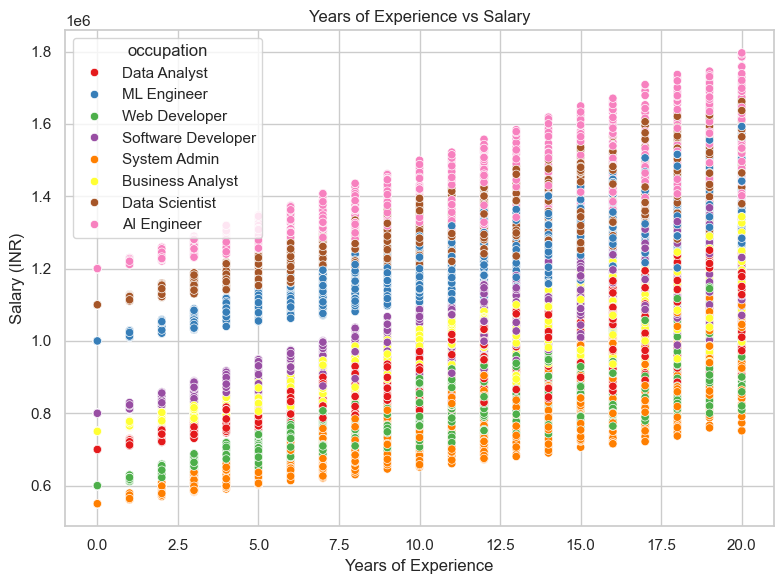

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='years_experience', y='salary_in_inr', hue='occupation', palette='Set1')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\sarah\AppData\Local\Temp\ipykernel_7640\3855784054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='education', y='salary_in_inr', estimator='mean', palette='coolwarm')


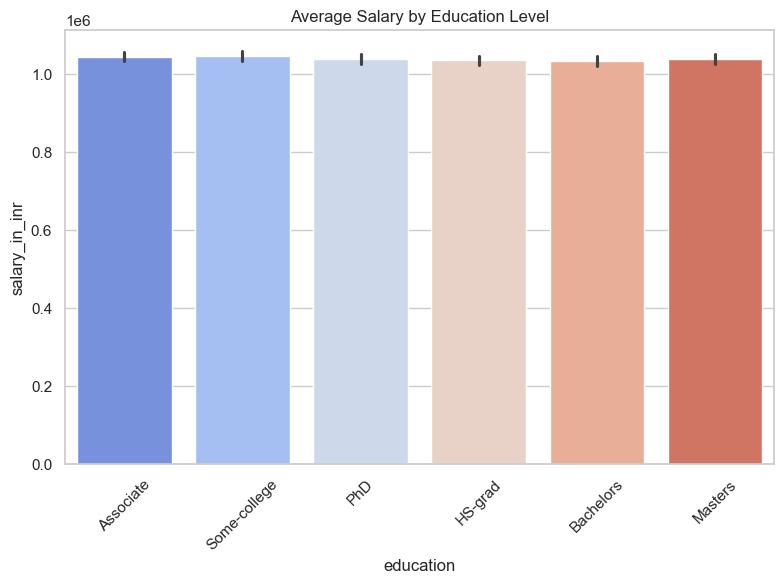

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='education', y='salary_in_inr', estimator='mean', palette='coolwarm')
plt.title('Average Salary by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\sarah\AppData\Local\Temp\ipykernel_7640\2249636761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='salary_in_inr', palette='pastel')


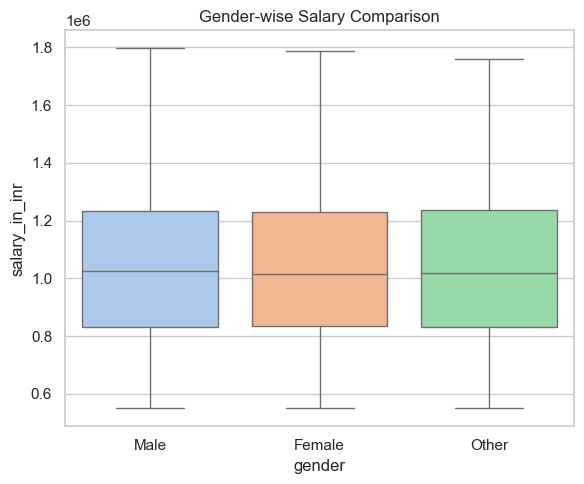

In [22]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='gender', y='salary_in_inr', palette='pastel')
plt.title('Gender-wise Salary Comparison')
plt.tight_layout()
plt.show()


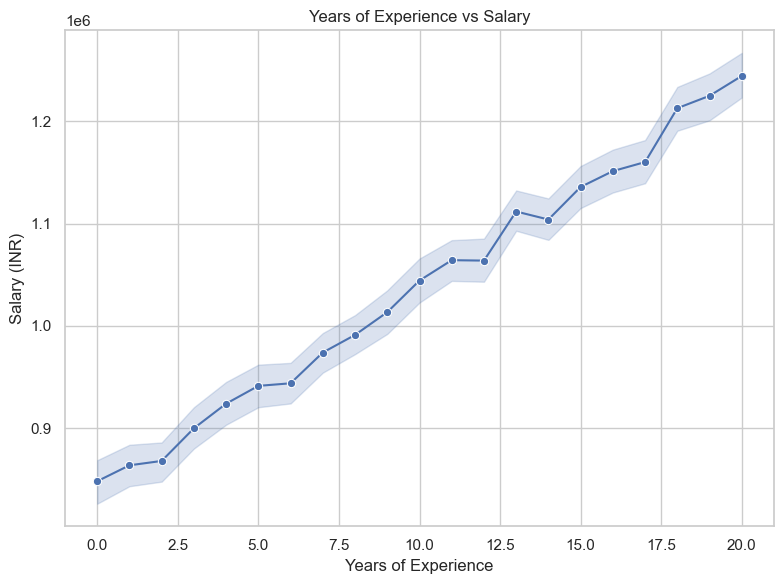

In [24]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df.sort_values('years_experience'), x='years_experience', y='salary_in_inr', marker='o')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()


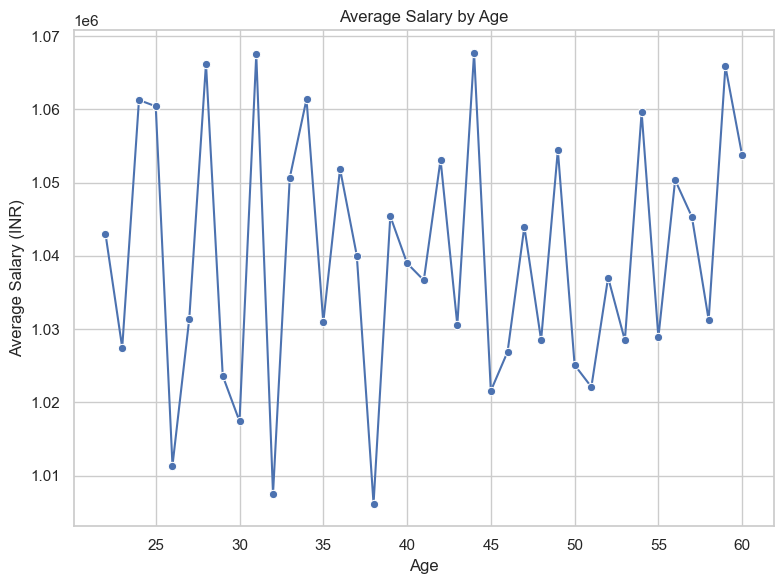

In [25]:
# Group by age and calculate mean salary
age_salary = df.groupby('age')['salary_in_inr'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=age_salary, x='age', y='salary_in_inr', marker='o')
plt.title('Average Salary by Age')
plt.xlabel('Age')
plt.ylabel('Average Salary (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\sarah\AppData\Local\Temp\ipykernel_7640\305369113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='native-country', palette='viridis')


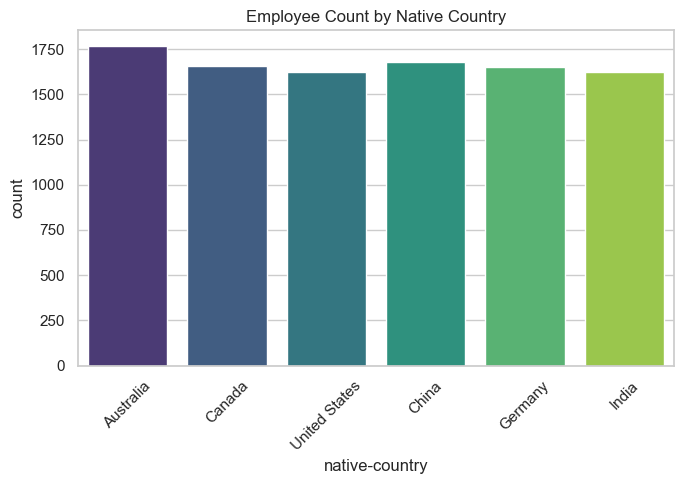

In [23]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='native-country', palette='viridis')
plt.title('Employee Count by Native Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Drop unused columns if needed
df.drop(columns=['income'], errors='ignore', inplace=True)

# One-hot encode categorical columns
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'race', 'gender', 'native-country']
df = pd.get_dummies(df, columns=categorical_cols)

# Extract skills
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
skills_matrix = vectorizer.fit_transform(df['skills'])
skills_df = pd.DataFrame(skills_matrix.toarray(), columns=[f"skill_{s}" for s in vectorizer.get_feature_names_out()])

df.reset_index(drop=True, inplace=True)
skills_df.reset_index(drop=True, inplace=True)

df = pd.concat([df.drop('skills', axis=1), skills_df], axis=1)


c:\Users\sarah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [3]:
X = df.drop(columns=["salary_in_inr"])
y = df["salary_in_inr"]


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    results.append({"Model": name, "R2 Score": r2, "MAE": mae, "RMSE": rmse})

results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)


               Model  R2 Score            MAE           RMSE
0  Linear Regression  0.931964   49689.849670   66491.470134
2  Gradient Boosting  0.930499   50211.310797   67203.586224
1      Random Forest  0.925690   51031.817090   69490.012048
3      Decision Tree  0.858047   67456.544500   96044.081680
4                KNN -0.187821  230329.240200  277826.308187


In [5]:
import joblib

# Replace with best model name from above
best_model = LinearRegression()
best_model.fit(X_train, y_train)

joblib.dump(best_model, "salary_model.pkl")
joblib.dump(X.columns.tolist(), "model_features.pkl")


['model_features.pkl']

In [6]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

search = RandomizedSearchCV(xgb, param_distributions=param_grid,
                             scoring='r2', n_iter=10, cv=3, verbose=1, random_state=42)
search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Best R2 Score: {r2_score(y_test, y_pred):.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best R2 Score: 0.9294


In [7]:
joblib.dump(best_model, "salary_model1.pkl")
joblib.dump(X.columns.tolist(), "model_features1.pkl")


['model_features1.pkl']

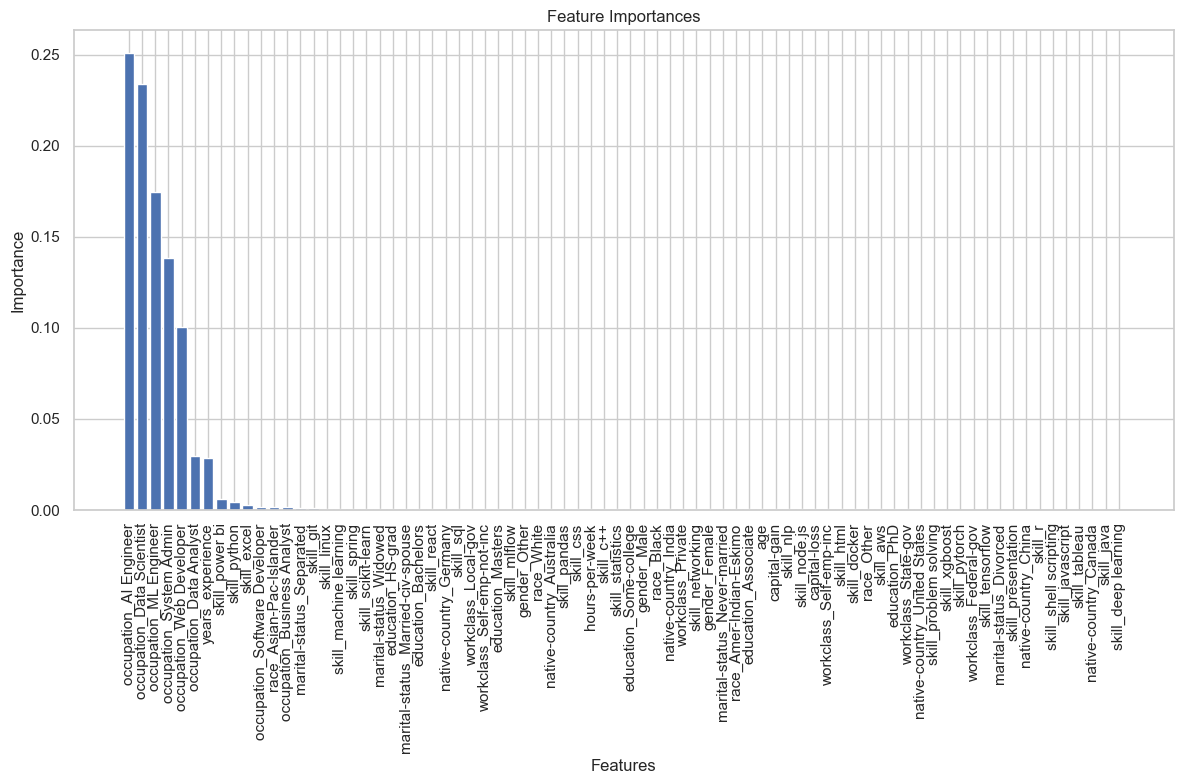

In [8]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns   
sns.set(style="whitegrid")
# Visualize feature importance
plt.figure(figsize=(12, 8))
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.savefig("feature_importances.png")
plt.show()